# Overview

This week's curriculum is a little bit of a mixed bag. We'll cover 2.33 topics that are not super-related, but both are _very useful_ (and there is some connection between them). The overview is

* Tricks for raw text (NLPP, Chapter 3) and finding the important words in a document (TF-IDF)
* Community Detection

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the second part we will go back to network science, discussing community detection and trying it out on our very own dataset.

## The informal intro

You didn't think you'd be able to avoid hearing a little update from me, did you? I didn't think so :) 
* Today, I'll go over the work we'll be focusing on today (spoiler, it's a brand new lecture which I'm very excited about), then
* And I'll talk about the stuff you'll be learning today is just now leading to break-throughs in our understanding of the brain!
* And finally, I'll talk a tiny amount about the next phase of the class (the project assignments).

(Next week, however, the informal intro will provide full details about the project phase of the class, so that's one not to miss.)

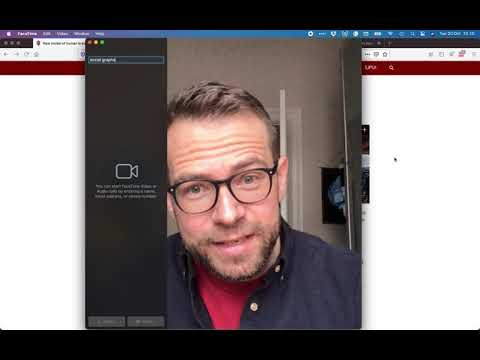

In [1]:
from IPython.display import YouTubeVideo, HTML, display
YouTubeVideo("XfDBYLA0q1I",width=800, height=450)

Video links
* Sune's community detection algorithm, for overlapping communities (that we're learning about today) is right now helping create break-throughs in brain science: https://news.iu.edu/stories/2020/10/iub/releases/19-neuroscientists-build-new-human-brain-network-model.html

**Questionnaire feedback**

Now for a second video, where I briefly address the second round of questionnaires. Thank you to those who filled one out! I also talk about the amazing TAs and give a great rant about active learning and why we keep doing it.

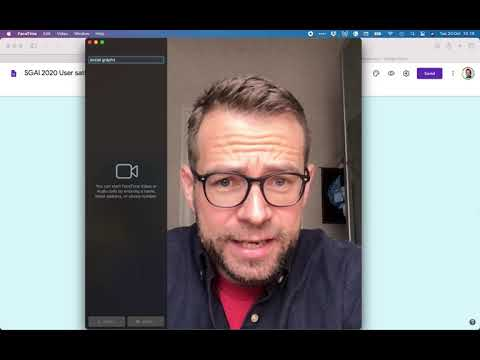

In [2]:
YouTubeVideo("T7qw4wbl_TQ",width=800, height=450)

Survey video links
* Active learning is better than class room learning https://www.pnas.org/content/111/23/8410
* Students think active learning is worse, but they actually learn more https://www.pnas.org/content/116/39/19251
* Sune's page on Employee of the month https://sunelehmann.com/employee-of-the-month/

# Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

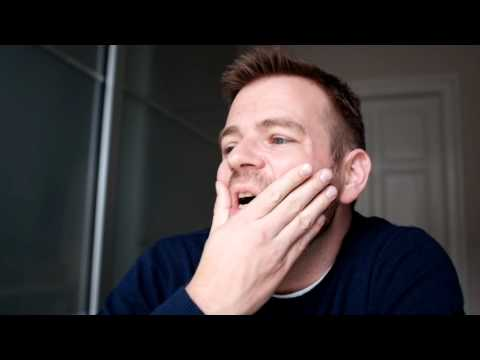

In [3]:
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Words that characterize the heroes

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

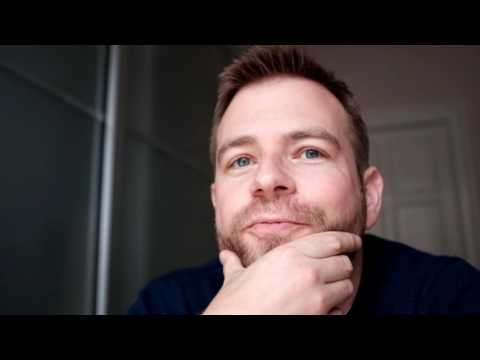

In [4]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

Now, we'll use the wordcloud visualization techniques from the paper/video to learn about the wiki-pages we've downloaded. 

In the exercises below, we'll use a technique from Sune's very own brain to do the Marvel vs. DC comparison (I call it "TF-TR"). Then proceed do some network analysis (!) to find network communities in one of the universes. Finally, jump back to NLP to used the communities we've just found to play with TF-IDF, a more standard technique. 

We'll also do a bit of data cleaning along the way (using some of the stuff you've just read about in Chapter 3).

_Exercise_ 1: Comparing word-counts of Marvel and DC heroes. \[The longest exercise in the class 😱\]. It consists of four steps. And it's great.


**Step one: TF List**

The goal of this exercise is to create your own wordclouds, characterizing the two comic-book universes. Check out my awesome word-clouds below. I think it's pretty clear

Marvel            |  DC
:-------------------------:|:-------------------------:
![im](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/marvel.png "marvel")  |  ![im](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/dc.png "dc")


*Setup*. All you need now is the wikipedia pages of the superheroes. If you didn't keep the wiki pages you previously downloaded, you can find them [here](https://github.com/SocialComplexityLab/socialgraphs2020/blob/master/files/character%20wiki%20pages.zip).

Once you have the texts down on your own computer, you will want to aggregate the text into two long lists. One based on all the text from the Marvel pages, and one based on all the text from the DC pages. In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. For example, my Marvel list contains the entries:

```
...

wolverine 452
avenger 129
mutant 630

...
```

In [23]:
import glob
import os
import nltk, re, pprint
from nltk import word_tokenize

from nltk.corpus import stopwords
from wordcloud import WordCloud

import math
import matplotlib.pyplot as plt

In [6]:
dc_file_list = glob.glob(os.path.join(os.getcwd(), "data/dc", "*.txt"))
marvel_file_list = glob.glob(os.path.join(os.getcwd(), "data/marvel", "*.txt"))

In [7]:
corpus_dc = []
corpus_marvel = []

for path in dc_file_list:
    with open(path, encoding = 'utf-8') as file:
        corpus_dc.append(file.read())

for path in marvel_file_list:
    with open(path, encoding = 'utf-8') as file:
        corpus_marvel.append(file.read())

In [8]:
# Concatenate into one big string for both corpus
corpus_dc_string = ' '.join(corpus_dc)
corpus_marvel_string = ' '.join(corpus_marvel)

This list is called a ***Term Frequency*** (or TF) list. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each universe.

The function below is responsible for the text parsing and cleaning, including operations such as:

* Tokenizing (separating long text into words/tokens)
* Removing punctuation and numbers
* Removing stopwords (very frequenct English auxiliary words with no meaningful value)
* Basic stemming (removing suffixes from words)
* Lemmatization (removing conjugations from words and keeping them in base dictionary form)

In [9]:
def cleaning_text_corpus(corpus_str):
    
    # Tokenize the corpuses 
    tokens_list = nltk.word_tokenize(corpus_str)
    
    # Remove all non-alphabetic tokens and set all remaining tokens to lower case
    words_list = [w.lower() for w in tokens_list if w.isalpha()]
    
    # Remove stopwords
    stopwords_set = set(stopwords.words('english'))
    no_sw_words_list = [w for w in words_list if w not in stopwords_set]
    
    # Stemming
    def stem(word):
        regexp = r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
        stem, suffix = re.findall(regexp, word)[0]
        return stem
    stemmed_words_list = [stem(w) for w in no_sw_words_list]
    
    # Lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    clean_words_list = [lemmatizer.lemmatize(w) for w in stemmed_words_list]
    
    return clean_words_list

After the original corpus of text is read for both universes, we must clean it accordingly, to make it ready for a nice visualization:

In [14]:
wordlist_dc = cleaning_text_corpus(corpus_dc_string)
wordlist_marvel = cleaning_text_corpus(corpus_marvel_string)

Now, we compute the term frequency for each word, which is simply a frequency count for each of the words:

In [15]:
# Create TF list (term frequency)
TF_dc = nltk.FreqDist(wordlist_dc)
TF_marvel = nltk.FreqDist(wordlist_marvel)

**Step two: Word weights**

TF is not necessarily a good way of sorting a list, since many words are very common, so the most common words are not necessarily the most important ones. This is clear from the top counts in my marvel TF list

```
of 1623
comics 1577
marvel 1549
in 1528
and 1520
the 1518
to 1512
a 1511
is 1500
by 1498
was 1473
as 1466
ref 1457
with 1450
first 1447
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's important.*** Thus, to create awesome and informative wordclouds like the ones I created above, we want to extract what's special about each of the two lists we're comparing. 

The general way of doing that is using a strategy called TF-IDF. We will explore that strategy in execise 4 below. But out-of-the-box TF-IDF gets a bit weird when we only have two groups to compare. So we'll do something different (but related) here. 

We want to use the information stored in TF, which is important since it says something about the most frequently occuring words. **But we want to weigh the TF information** using additional information about what is unique about each universe. 

Specifically, we want to set things up such that - in the Marvel list, for example - words that are unique to Marvel get a high weight, while words that are unique to DC get a low weight, and words that occur at the same frequency in both lists are neutral. Vice versa for the DC list.

The way I chose to set up the weights here is simple. I use term ratios (TR), which I just made up, so don't look it up on the internet. What we care about is words that are used very differently in the two universes, so we just use their ratios. 

Let me start with an example. The word `wolverine` occurs 452 in the marvel TF list and 9 times in the DC TF list, thus I set it's Marvel weight to

$$w_\textrm{wolverine}^{(m)} = \frac{452}{9 + c} = 13.29.$$

Similarly, its DC weight is 

$$w_\textrm{wolverine}^{(d)} = \frac{9}{452 + c} = 0.02.$$

In both cases, I add the constant $c$ to the denominator in case a word occurs zero times. You can play around with the size of $c$ to understand the effect of chosing small/large values of it.

In general for some token $t$ with term frequency $\textrm{TF}^{(u)}_t$, in universe $u$ where $u \in \{m,d\}$, we define the weight as:

$$w_{t}^{(m)} = \frac{\textrm{TF}^{(m)}_t}{ \textrm{TF}^{(d)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(d)} = \frac{\textrm{TF}^{(d)}_t}{ \textrm{TF}^{(m)}_t + c}. $$

Thus, now we're ready to lists for each univers, where the ranking of token $t$ on list $u$ is given by $\textrm{TF}^{(u)}_t \times w_{t}^{(u)}$. I call this the *TF-TR* lists. 

Note that the *TF-TR* lists have the properties that we requested above. The weight associated with a word is large when a word occurs much more frequently in the list we consider, compared to the other list. It's small when a word is rare in our list and frequent in the other. And it's approximately equal to one, when the word is equally frequent in both lists. (The downside is that it only works when you're finding important terms while two lists).

> *Action item*: 
> * Create your TF-TR list for each universe.
> * Check out top 10 for each universe. Does it make sense?

The takehome here is that we get a good ranking by combining the term frequency with some weighting scheme. But, as we will see below, the TR weight that I created is not the only possible weight. There are many other options.

-----------

PS. Above in creating the ratios, I'm assuming that the universes have a comparable number of words in them. That's pretty much true. And while the approximation is OK for our purposes, it's not true in general. If you'd like an extra challenge, you can figure out how to account for differences in the size of each universe.

Using the function below, we will compute the TF-TR ranking for each of the words.

<font color='blue'>Term frequency suggests how frequent a word occurs in general, but it is not able to distinguish the words that are unique to different corpora or universes, since the most frequent words will end up showing in all the corpora.</font>
   
<font color='blue'>Therefore, we would like to implement a _term ratio_, which represents the ratio of frequency across universes for every word, to assign a weight to the words.</font>
    
<font color='blue'>In this way, if one word is occurring frequently both in universe A as well as in universe B, the ratio would help diminish its importance; On the hand, if a word only appears significantly alot in one universe (unique to that universe) but not in the other, it would be assigned a high weight for that particular universe, thereby it will be ranked higher.</font>

<font color='blue'>The weights for the words are calculated using the following expressions: </font>

$$w_{t}^{(m)} = \frac{\textrm{TF}^{(m)}_t}{ \textrm{TF}^{(d)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(d)} = \frac{\textrm{TF}^{(d)}_t}{ \textrm{TF}^{(m)}_t + c}. \qquad \textrm{where} \quad m = Marvel, d = DC$$ 

<font color ='blue'> The TF-TR value for each word will then be calculated as: </font>
    
$$\textrm{TF}^{(u)}_t \times w_{t}^{(u)}, \qquad \textrm{where} \quad u \in \{m,d\}$$
    
<font color='blue'> In order to avoid that a word occurs 0 times or in other words the situation of dividing by 0, we are adding a constant $c$ to the denominator of the weight calculation formula. Different values of this constant would influece the ratio differently:  </font>

* <font color='blue'> Large constant: it will shrink the difference in word weights for the different universes; </font>

* <font color='blue'> Small constant: it will not influence the weight significantly; </font>

In [16]:
# Function for generating the TF-TR dictionaries
def TFTR_ranking(c, tf_dict_main, tf_dict_secondary):
    term_rank = {}
    
    for key in tf_dict_main.keys():
        
        # Get frequency
        freq_main = tf_dict_main.get(key)
        freq_secondary = tf_dict_secondary.get(key)
        
        if (freq_main == None):
            freq_main = 0
            
        if (freq_secondary == None):
            freq_secondary = 0
            
        # Compute ratio of a word
        ratio = freq_main / (freq_secondary + c)
        # Compute rank of a word
        rank = freq_main * ratio
        
        term_rank[key] = rank
        
    return term_rank

We will apply our TF-TR ranking function to the cleaned word dataset, for each universe in part:

In [17]:
TFTR_dc = TFTR_ranking(c = 1, tf_dict_main = dict(TF_dc), tf_dict_secondary = dict(TF_marvel))
TFTR_marvel = TFTR_ranking(c = 1, tf_dict_main = dict(TF_marvel), tf_dict_secondary = dict(TF_dc))

**Step three: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. Use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step four: Draw the wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each universe. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)
> 

In [18]:
# Function for converting the word dictionary into a string
def dict_to_string(word_dict, shrink=True):
    
    total_string = ''
    
    for word in word_dict:
        
        # If the counts of words are too large, we divide the original count by 100 for computing faster
        if shrink==True:
            repeat_nr = math.ceil(word_dict[word] / 100)
        
        else:
            repeat_nr = math.ceil(word_dict[word])
        
        # Create a string of one term (occuring, in a proportional manner, according to the TF-TR scores)
        string = ''.join([word+' ' for count in range(repeat_nr)])
        
        # Concatenate the current elements to the total string
        total_string += string
        
    return total_string

Lastly, using the function above, the list of tokens will be converted back to a long string, with as many duplicates of a word as its _term rank_ (in reality, we chose to divide the number by 100 to allow reasonable code runtimes):

In [21]:
string_dc = dict_to_string(TFTR_dc)
string_marvel = dict_to_string(TFTR_marvel)

The wordclouds are drawn on a high-resolution plot, with color sets differentiating the two universes:

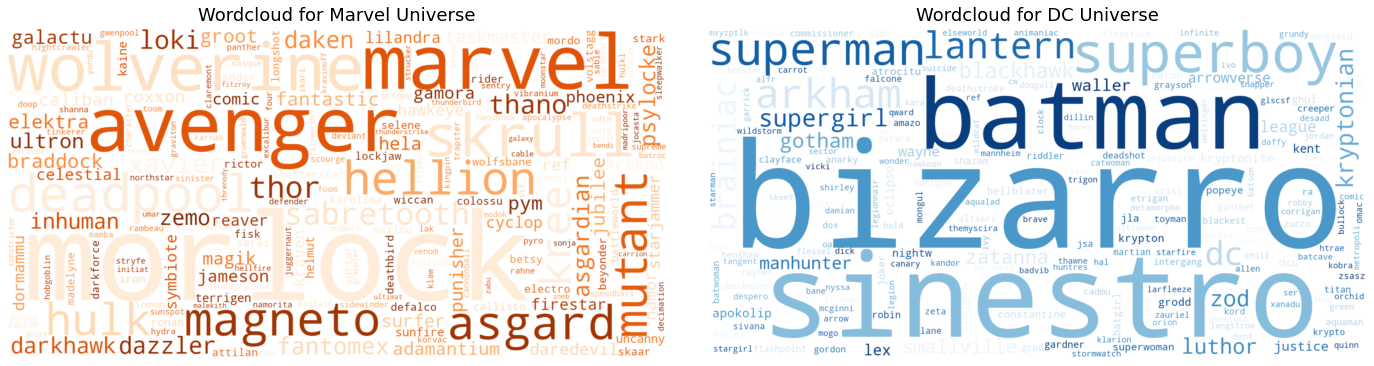

In [24]:
# Draw the word clouds:
plt.figure(figsize=[20, 20])

# Marvel wordcloud
plt.subplot(1, 2, 1)
wordcloud_marvel = WordCloud(width = 1600, 
                             height = 800, 
                             collocations = False, 
                             background_color = 'white', 
                             colormap = 'Oranges', 
                             random_state = 9).generate(string_marvel)
plt.imshow(wordcloud_marvel, interpolation = 'bilinear')
plt.title('Wordcloud for Marvel Universe', fontsize = 18, pad = 8.0)
plt.axis('off')

# DC wordcloud
plt.subplot(1, 2, 2)
wordcloud_dc = WordCloud(width = 1600, 
                         height = 800, 
                         collocations = False, 
                         background_color = 'white', 
                         colormap = 'Blues', 
                         random_state = 43).generate(string_dc)
plt.imshow(wordcloud_dc, interpolation = 'bilinear')
plt.title('Wordcloud for DC Universe', fontsize = 18, pad = 8.0)
plt.axis('off')
plt.tight_layout(pad = 4)
plt.show()

<span style="color:blue">What we can understand from these plots is that, indeed, the characters here seem to be both very popular in their own universe, but also unique to the respective universe in which they appear.</span>

<span style="color:blue">The results seem to be correct, considering that, for Marvel, many people discuss about Wolverine, Magneto, the Avengers, which are shown to be popular in our wordcloud. Similarly for DC: Batman, Superman, Green Lantern, Superboy are all very popular characters unique to their universe.</span>

# Community detection


Now that we have worked hard on text analysis, it is time to go back to our network! 

Before we begin, let's watch a great lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

You can watch the 2015 video [here](https://youtu.be/06GL_KGHdbE/).

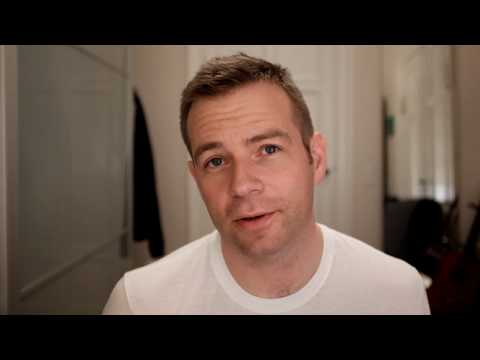

In [5]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

---
*Exercise 2*: Use the concept of modularity to explore how _community-like_ the universes are.

In [25]:
import pandas as pd
import networkx as nx
import re
import matplotlib.pyplot as plt

from matplotlib import colors
import random

> 
> * Explain the concept of modularity in your own words.

The concept of modularity provides a simple way to determine the extend to which a network has communities. One node can only be in one community. 

Therefore, modularity is the measure of difference between the fraction of edges inside a community and the amount of edges a community would have, if it was random. A higher modularity would correspond to a fewer then expected links between communities.

* If $M > 0$, then the subgraph $C$ has more links than expected by chance, and represents a potential community. $M$ cannot exceed 1.
* If $M = 0$, then the connectivity is the same as what would be given by a random network graph, therefore nothing can be concluded.
* If $M < 0$, then $C$ is not a community.

> * Consider the undirected version of the entire network, including both DC and Marvel.

In [26]:
df_marvel = pd.read_csv('marvel_characters.csv',sep ='|')
df_marvel = df_marvel.iloc[:,[1,2]]

In [27]:
df_dc = pd.read_csv('dc_characters.csv',sep ='|')
df_dc = df_dc.iloc[:,[1,2]]
df_dc = df_dc.rename(columns = {'WikiLink;':'WikiLink'}, inplace = False)
df_dc['WikiLink'] = df_dc['WikiLink'].str.strip(';')

In [28]:
import networkx as nx

# Create the Comics network as a directed graph
comics_graph = nx.DiGraph()

In [29]:
# Add nodes and with data (character name & universe)

# For MARVEL
for character_name in df_marvel['CharacterName']:
    comics_graph.add_node(character_name)
     
    # define universe
    comics_graph.nodes[character_name]['universe'] = 'marvel'
    
# For DC
for character_name in df_dc['CharacterName']:
    comics_graph.add_node(character_name)

    # define universe
    comics_graph.nodes[character_name]['universe'] = 'dc'

In [30]:
# Funtion for adding the links/references between the characters to the graph
def link_input(df, path_name, graph):
    for character_name_in in df['CharacterName']:

        # Load the page of the superhero, in a try-except clause for error catching
        try:
            with open(path_name + character_name_in + '.txt', 'r', encoding = 'utf8') as wiki_page:
                page = wiki_page.read()

            # Get all the reference links on the page (using regex)
            links = re.findall('\[{2}((?!.+?:)([^\]\[]+)\|([^\]\[]+)|([^\|]+?))\]{2}', page)
            reference_links = [(tuple(int(x) if x.isdigit() else x for x in _ if x)) for _ in links]

            for i in range(len(reference_links)):

                for character_name_out in df['CharacterName']:
                    if character_name_out == reference_links[i][0]:
                        # Add edge 1 by 1
                        graph.add_edge(character_name_in, reference_links[i][0])
        except:
            pass
        
    return graph

In [31]:
comics_graph = link_input(df = df_dc, path_name = './data/dc/', graph = comics_graph)
comics_graph = link_input(df = df_marvel, path_name = './data/marvel/', graph = comics_graph)

In [32]:
# Remove the isolated nodes from the graph
comics_graph.remove_nodes_from(list(nx.isolates(comics_graph)))

In [33]:
for component in list(nx.connected_components(comics_graph.to_undirected())):
    if (len(component) < 5):
        for node in component:
            comics_graph.remove_node(node)

In [34]:
# Create the undirected version of the Comics universe graph
comics_graph = comics_graph.to_undirected()

> * Now create your own partition into communities, where all Marvel-characters are one community and all the DC-characters are another community. That's all you need, **now calculate the modularity of this partition**. Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above.

#### Relevant variables:

* $N$ = total number of nodes in network
* $L$ = total number of links in network <br><br>
* $n$ = number of communities in network (in this case, $n = 2$) <br><br>
* $N_c$ = number of nodes in the community
* $L_c$ = number of links in the community <br><br>
* $k_c$ = total degree of nodes in the community, i.e. the degree sum of each node in the network that is in the community
* $M_c$ = modularity of the community <br><br>
* $M$ = the modularity for the whole partition

__There are 5 steps that we must go through, in order to make the partitioning and calculate the modularity of the partition:__

* Step 1: Compute $L$ from the full graph
* Step 2: Create a Marvel and a DC partition of subgraphs
* Step 3: Compute $k_c$ and $L_c$ from each subgraph
* Step 4: Compute $M_c$ for each subgraph
* Step 5: Sum together the two $M_c$ values, in order to compute $M$

Let us start with ___Step 1: Compute $L$ from the full graph___

In [37]:
# Step 1

L = comics_graph.number_of_edges()

In [38]:
print('Total number of links/edges in the Comics network:', L)

Total number of links/edges in the Comics network: 21455


Now, we move on to ___Step 2: Create a Marvel and a DC partition of subgraphs___

In [39]:
# Step 2

# make list of Marvel-character nodes
marvel_nodes = [character_name for character_name, attr in comics_graph.nodes(data = True) if attr['universe'] == 'marvel'] 
marvel_subgraph = comics_graph.subgraph(marvel_nodes)

# make list of DC-character nodes
dc_nodes = [character_name for character_name, attr in comics_graph.nodes(data = True) if attr['universe'] == 'dc']
dc_subgraph = comics_graph.subgraph(dc_nodes)

Now, we move on to ___Step 3: Compute $k_c$ and $L_c$ from each subgraph___

In [40]:
# Step 3

# Compute metrics for the Marvel subgraph
marvel_L_c = marvel_subgraph.number_of_edges()
marvel_k_c = 0

for character_name, degree in comics_graph.degree(marvel_nodes):
    marvel_k_c += degree

# Compute metrics for the DC subgraph
dc_L_c = dc_subgraph.number_of_edges()
dc_k_c = 0

for character_name, degree in comics_graph.degree(dc_nodes):
    dc_k_c += degree

In [41]:
print('Number of links/edges in the Marvel community: ', marvel_L_c)
print('Number of links/edges in the DC community:     ', dc_L_c)
print()
print('Total degree of all nodes for the Marvel community: ', marvel_k_c)
print('Total degree of all nodes for the DC community:     ', dc_k_c)

Number of links/edges in the Marvel community:  8558
Number of links/edges in the DC community:      12737

Total degree of all nodes for the Marvel community:  17276
Total degree of all nodes for the DC community:      25634


Now, we move on to ___Step 4: Compute $M_c$ for each subgraph___ (using _Equation 9.11_):

In [42]:
# Step 4

marvel_M_c = (marvel_L_c / L) - pow(marvel_k_c / (2 * L), 2)
dc_M_c = (dc_L_c / L) - pow(dc_k_c / (2 * L), 2)

In [43]:
print('The modularity of the Marvel community: ', marvel_M_c)
print('The modularity of the DC community:     ', dc_M_c)

The modularity of the Marvel community:  0.23678647558169283
The modularity of the DC community:      0.23678647558169286


In [44]:
# For debugging:

# print((marvel_L_c / L))
# print(pow(marvel_k_c / (2 * L), 2))
# print()

# print((dc_L_c / L))
# print(pow(dc_k_c / (2 * L), 2))
# print()

# print((marvel_L_c / L) - pow(marvel_k_c / (2 * L), 2))
# print((dc_L_c / L) - pow(dc_k_c / (2 * L), 2))

Finally, we move on to ___Step 5: Sum together the two $M_c$ values, in order to compute $M$___

In [45]:
# Step 5

M = marvel_M_c + dc_M_c

print('The modularity for our created partition is: ', M)

The modularity for our created partition is:  0.4735729511633857


> * Are the universes good communities?

__The universes seem to be really good communities, and create a good partitioning of the Comics network graph, which can be demonstrated through the relatively-large value $M$ of the modularity.__ 

Let us remember that, if $M > 0$, more specifically when $M \in (0, 1]$, then the partition has more links than expected by random chance, and represents a potential community.

> * Would you expect this result in light of what we have found in the previous exercises?

Definitely, these results indeed resemble nicely what we have seen from the many previous exercises (and also from common sense, we would argue, for anyone who is familiar with these universes).

---
*Exercise 3*: Community detection, considering each universe separately. 
> * Consider the network of heroes for each universe separately. 
>    - **Note**. For this exercise, it's OK to just pick one of the universes. 
>    - If you want to work with the entire network. Then run community detection on each universe separately, then combine results to get a list containing all communities from both parts of the network.
>    - (The reason for this is that the strong split between Marvel/DC universes can confuse the algorithm a bit).
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities for each network. 
    >   * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
    >   * You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.    

___We will work upon the DC universe, for this notebook exercise.___

We have used the Louvain algorithm implementation from `conda`, and installed it using the command: `conda install -c auto python-louvain`.

In [62]:
import community

In [63]:
louv_partition = community.best_partition(dc_subgraph)

In [87]:
print("The Louvain algorithm has found", len(set(louv_partition.values())), "communities for our DC network.")

The Louvain algorithm has found 15 communities for our DC network.


Let us first display the found communities, so that we can better understand how they look like:

In [65]:
# Displaying the communities

dict_communities = {}

for community_nr in range(0, max(louv_partition.values()) + 1):
    dict_communities[community_nr] = [name for name, comm in louv_partition.items() if comm == community_nr]
    
# for community_nr, character_name_list in dict_communities.items():
#     print('Community', str(community_nr + 1))
#     print()
#     print(character_name_list)
#     print()

Even though we have made sure to remove isolated nodes completely earlier in the notebook, the Louvain algorithm sometimes creates some communities of 1-2 characters, because of their weak interaction with the rest of the universe. 

This is totally fine, and we will keep these communities and analyze them later on, however specifically for the purpose of visualizing the community separation, keeping them would result in the Force-Atlas algorithm being confused and placing nodes from these small communities at a very far distance from the central cluster, thus making the plot shrink undesirably.

Thus, only for this optional part, we will remove communities of less than 5 elements, and plot the major ones in the graph below:

In [74]:
# For this visualization, let's create a modifiable copy of the DC subgraph
viz_dc_graph = dc_subgraph.copy()
viz_louv_partition = louv_partition.copy()

# Split the nodes by their community number
dict_communities = {}

for community_nr in range(0, max(viz_louv_partition.values()) + 1):
    dict_communities[community_nr] = [name for name, comm in viz_louv_partition.items() if comm == community_nr]
    
    # The Force-Atlas methods needs removal of the communities with a very few number of elements
    if (len(dict_communities[community_nr]) < 5):
        viz_dc_graph.remove_nodes_from(dict_communities[community_nr])
        [viz_louv_partition.pop(element) for element in dict_communities[community_nr]]
        dict_communities.pop(community_nr)

Let us also display the graph which contains a grey-scale color code for the Louvain community partitions:

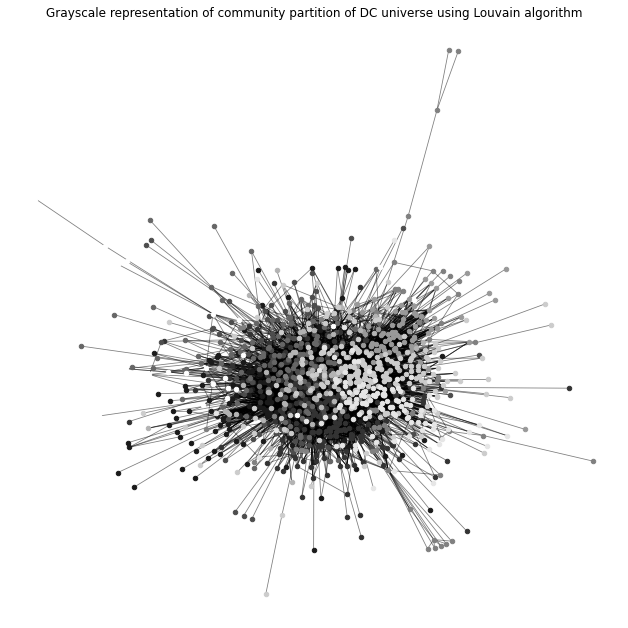

In [80]:
# Let us draw a graph representing this partitioned community

size = float(len(set(viz_louv_partition.values())))
pos = nx.spring_layout(viz_dc_graph)
count = 0

plt.figure(figsize = [11, 11])
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.axis('off') # to remove the black-border frame of the plot

for comm in set(viz_louv_partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in viz_louv_partition.keys() if viz_louv_partition[nodes] == comm]
    
    nx.draw_networkx_nodes(viz_dc_graph, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(viz_dc_graph, pos, alpha = 0.5, width = 0.8);
plt.title("Grayscale representation of community partition of DC universe using Louvain algorithm");

> * Report the value of modularity found by the algorithm.

In [78]:
louv_partition_M = community.modularity(louv_partition, dc_subgraph)

print('The modularity for the best-partition found by the Louvain algorithm is:', louv_partition_M)

The modularity for the best-partition found by the Louvain algorithm is: 0.36788770843412955


> * Is it higher or lower than what you found above for the universes as communities? What does this comparison reveal about them?

__The modularity for the "ideal" best-found partition by the Louvain algorithm seems to be very close (and slightly higher) than the modularity we have computed by splitting the DC network graph into multiple communities.__ In any case, the modularity is higher than 0, which means that we have found meaningful, relevant communities with the Louvain algorithm, even though the number of communities is larger than 2 (which we previously naturally selected), so the exact ways in which these communities were identified is not as easy to relate to.

> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_.

First of all, let us calculate the most appropriate positions for the nodes of the Comics network graph, using the Force Atlas method:

In [81]:
from fa2 import ForceAtlas2 as FA2

In [82]:
# Create instance for FA2
forceatlas2 = FA2(scalingRatio = 100, gravity = 100)

positions = forceatlas2.forceatlas2_networkx_layout(viz_dc_graph, pos = None, iterations = 250)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:11<00:00, 22.66it/s]

BarnesHut Approximation  took  1.41  seconds
Repulsion forces  took  9.24  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.11  seconds


After we have found the most appropriate positions for every node in the graph, let us also make a color (and size) coding based on the __community partitioning__ found using the Louvain algorithm:

In [83]:
all_colors_dict = dict(colors.CSS4_COLORS)
character_color_dict = {}
community_color_list = []

for community_nr, character_name_list in dict_communities.items():
    
    # Choose a random color entry
    color_k = random.randint(0, len(all_colors_dict) - 1)
    
    # Retrieve the color HEX for that random color
    color = all_colors_dict[list(all_colors_dict)[color_k]]
    
    # Remove the color already chosen by one community, so that we don't end up with duplicate colors by accident
    all_colors_dict.pop(list(all_colors_dict)[color_k])
    
    # For every node in this community, we assign them the previously-computed random color
    for character_name in character_name_list:
        character_color_dict[character_name] = color
    
    # Preserve the HEX color of the community, for future plotting
    community_color_list.append(color)
        
# The node colors in the DICT are not in the same order as the nodes in the graph, therefore we need to create a separate list to deal with that
node_color_list = []
# At the same time, we will create a list of node sizes by looking directly at the degree of each individual node (within the undirected Comics network)
node_size_list = []

for node in viz_dc_graph:
    # Append the appropriate color to a node
    node_color_list.append(character_color_dict[node])
    
    # Append the appropriate size to a node
    node_size_list.append(comics_graph.degree(node) * 0.6)

Finally, let us visualize the graph (using the Force-Atlas method):

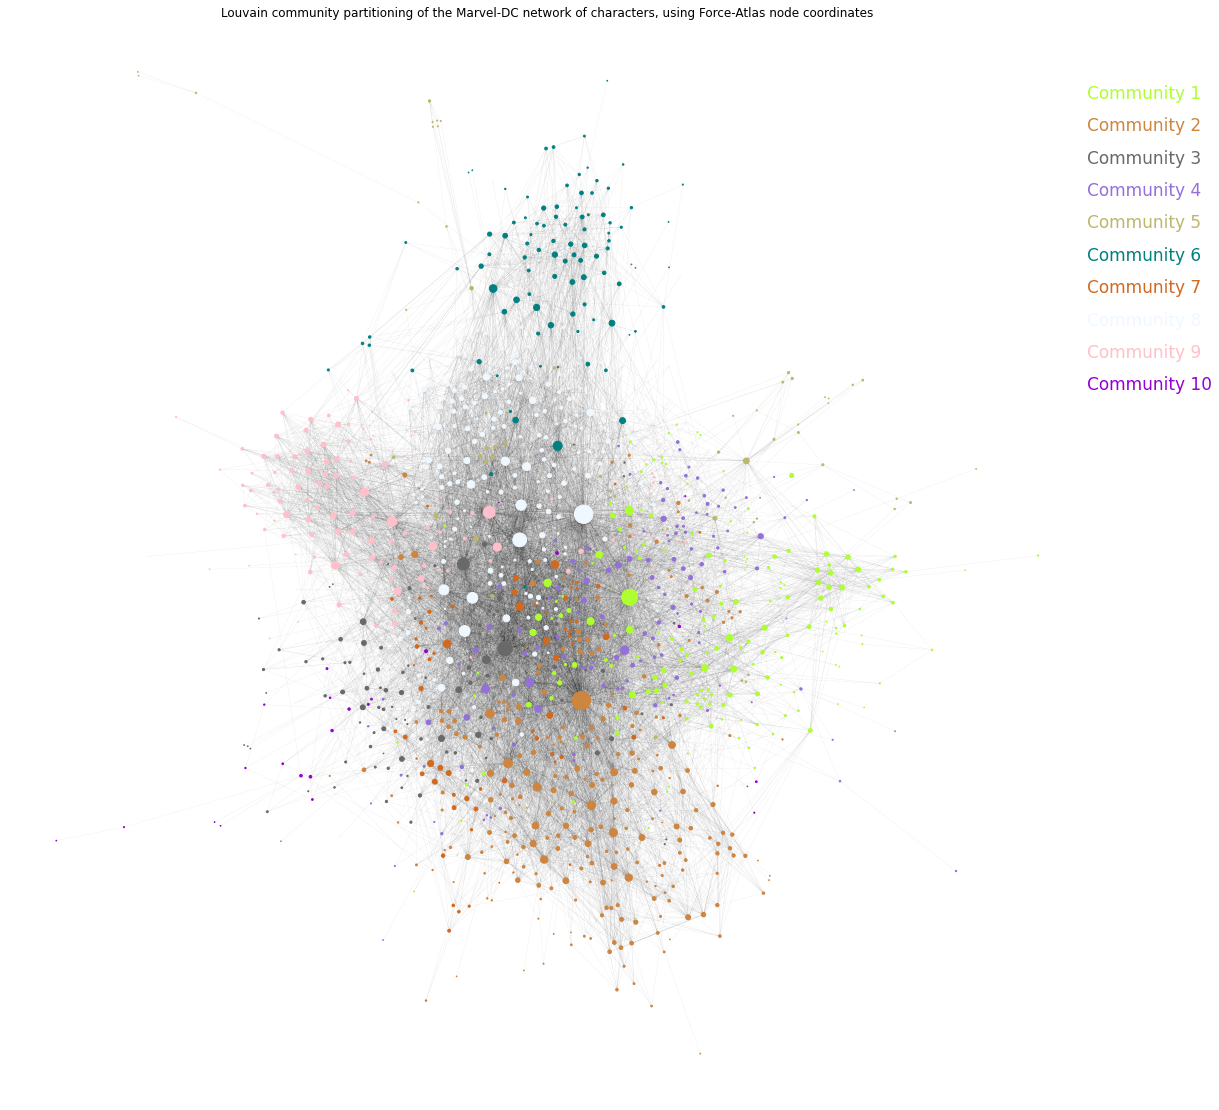

In [84]:
plt.figure(figsize = (15, 15))

nx.draw(viz_dc_graph, pos = positions, node_size = node_size_list, node_color = node_color_list, width = 0.025)

y = 0.93 # This is the starting Y, for the figure text
# Indicating community colors
for i in range(0, len(dict_communities)):
    plt.figtext(1, y, str('Community ' + str(i + 1)), size = 17, color = community_color_list[i])
    y = y - 0.03

plt.title("Louvain community partitioning of the Marvel-DC network of characters, using Force-Atlas node coordinates");

In [85]:
character_color_dict = {}
community_color_list = ['#00FA9A', '#0000FF', '#228B22', '#6495ED', '#FF1493', '#FFD700', '#4169E1', '#FF0000', '#7FFF00', '#808080', '#3DFA23', '#ABB351']

for community_nr, character_name_list in dict_communities.items():
    
    # For every node in this community, we assign them a previously-computed color
    for character_name in character_name_list:
        character_color_dict[character_name] = community_color_list[community_nr]
                
        
# The node colors in the DICT are not in the same order as the nodes in the graph, therefore we need to create a separate list to deal with that
node_color_list = []
# At the same time, we will create a list of node sizes by looking directly at the degree of each individual node (within the undirected Comics network)
node_size_list = []

for node in viz_dc_graph:
    
    # Append the appropriate color to a node
    node_color_list.append(character_color_dict[node])

    # Append the appropriate size to a node
    node_size_list.append(viz_dc_graph.degree(node) * 0.6)

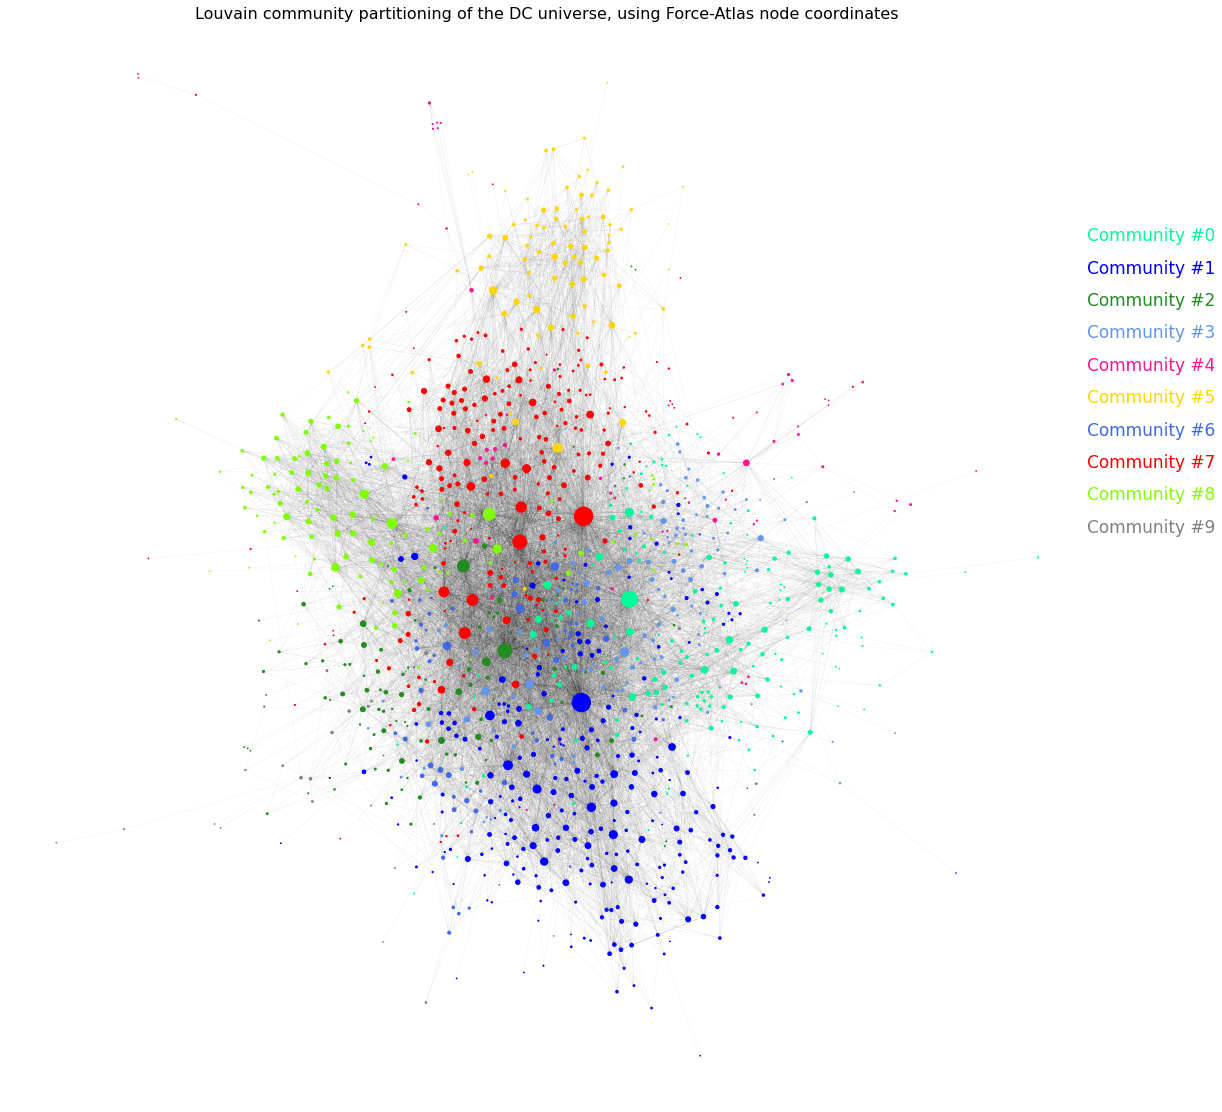

In [86]:
plt.figure(figsize = (15, 15))

nx.draw(viz_dc_graph, pos = positions, node_size = node_size_list, node_color = node_color_list, width = 0.025)

y = 0.80 # This is the starting Y, for the figure text
# Indicating community colors
for i in dict_communities.keys():
    plt.figtext(1, y, str('Community #' + str(i)), size = 17, color = community_color_list[i])
    y = y - 0.03

plt.title("Louvain community partitioning of the DC universe, using Force-Atlas node coordinates", fontsize = 16);

> * Describe the structure you observe.

<span style="color:blue">The graph shows that the communities from the DC universe seem to interact a lot with each other, although nodes from a community will always interact most with other nodes from the same community, as per the modularity maximization principle which the Louvain algorithm used for finding the best partition.</span>

---

Now we jump back into the NLP work. **It's still OK to work with just one universe**. In this last exercise, we'll be creating word-clouds again. But this time, we'll be using the more standard method: TF-IDF.


*Exercise 4*: Wrap your brain around TF-IDF



First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is still to have a *term frequency* (TF) and a *weight* (IDF), but there are some additional things going on. For example, there are multiple definitions of TF. We just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count.
>   * What does IDF stand for?

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is?
>   * Explain why using IDF makes stopword removal less important.
>   * In the TR weight that I defined in Exercise 1, we take into account how frequently each word appears inside each of the two documents. Is information of word counts inside each document used in the definition of IDF on Wikipedia?

I noted above that out-of-the box worked weirdly when you only have two documents. Let's see why that's the case. If we grab one of the simple definitions of IDF-weight from wikipedia

$$\log \left( \frac{N}{n_t+1} \right) + 1.$$

Where $N = 2$ is the number of documents and $n_t \in \{1,2\}$ is the number of documents containing the term $t$.

> *Action item*
>   * What are the possible weights that a word can have?
>   * Explain in your own words why TF-IDF might not result in ideal wordclods when you only have two documents.

*Pro-level consideration*: It is, of course, possible to define IDF weighting schemes that incorporate information of word-counts within each document, even if you have more than two documents. If you'd like to try to do that below, it's OK with me. If not, that's also fine.

**To be continued ...**. Next week, we'll look at sentiment and TFIDF for communities.

Thanks to TA Alexandra for helping create these exercises.